Open Machine Learning Course 

# <center> Home Task 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here")**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Read data**

In [2]:
try:
    df = pd.read_csv("titanic_train.csv", index_col="PassengerId")
except:
    url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
    df = pd.read_csv(url, index_col="PassengerId")

In [3]:
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'})
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,No,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


**Отбрасываем `Cabin`, а затем — все строки с пропущенными значениями.**

In [6]:
df = df.drop("Cabin", axis=1).dropna()

In [7]:
df.shape

(712, 10)

**1. Постройте картинку, чтобы визуализировать все точечные диаграммы для каждой пары функций `Age`, `Fare`, `SibSp`, `Parch` и `Survived`. ( `scatter_matrix` из Pandas или `pairplot` из Seaborn)**

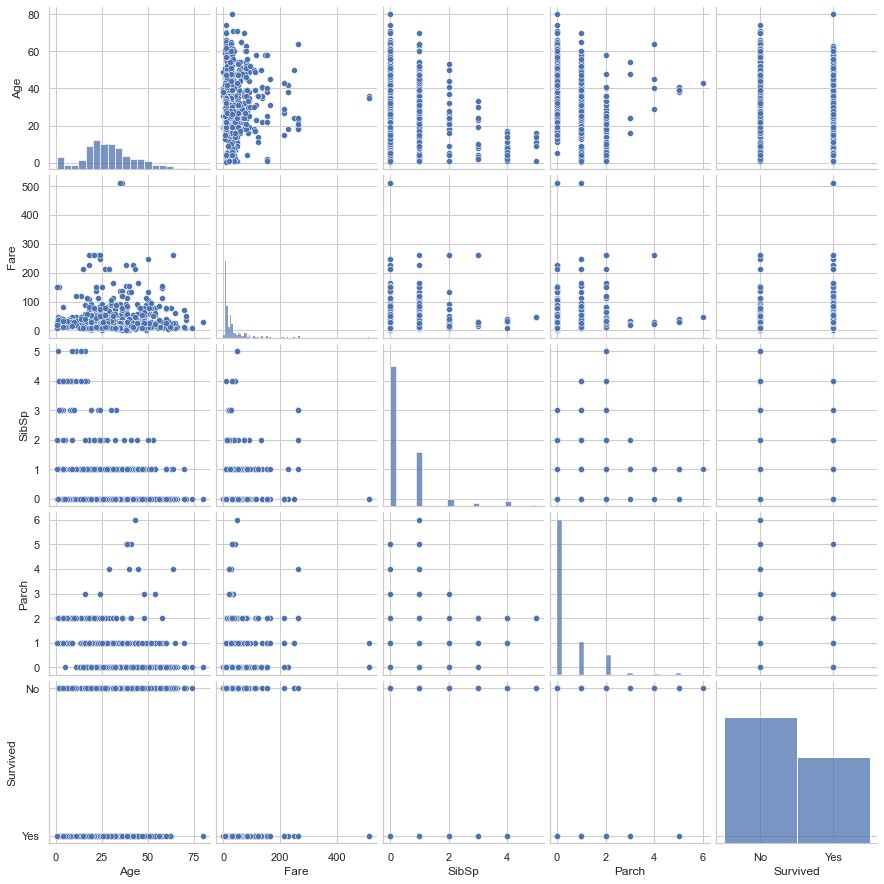

In [8]:
sns.set_theme(style="whitegrid")
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp', 'Parch', 'Survived'])

**2. Как цена билета (`Fare`) зависит от `Pclass`? Постройте коробочную диаграмму.**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

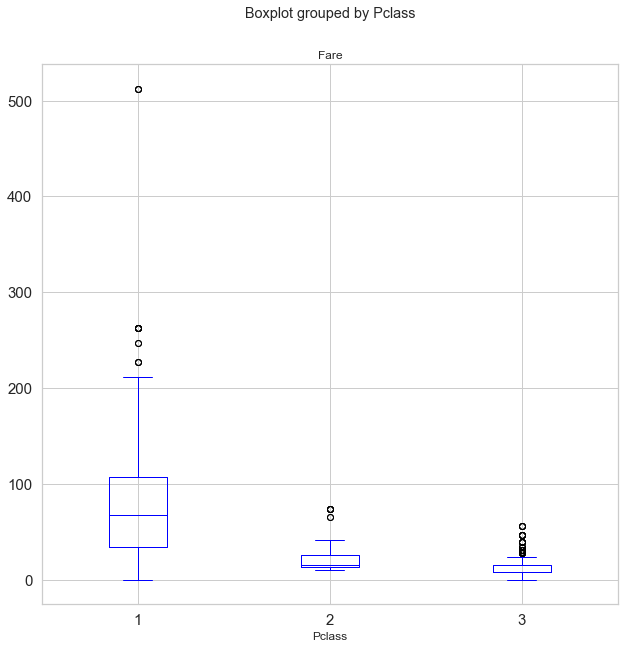

In [9]:
df.boxplot('Fare', by='Pclass', color='blue', figsize=[10, 10], fontsize=15)

**3. Давайте построим тот же график, но ограничим значения `Fare` меньше 95% квантиля исходного вектора (чтобы исключить выбросы, которые делают график менее четким).**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

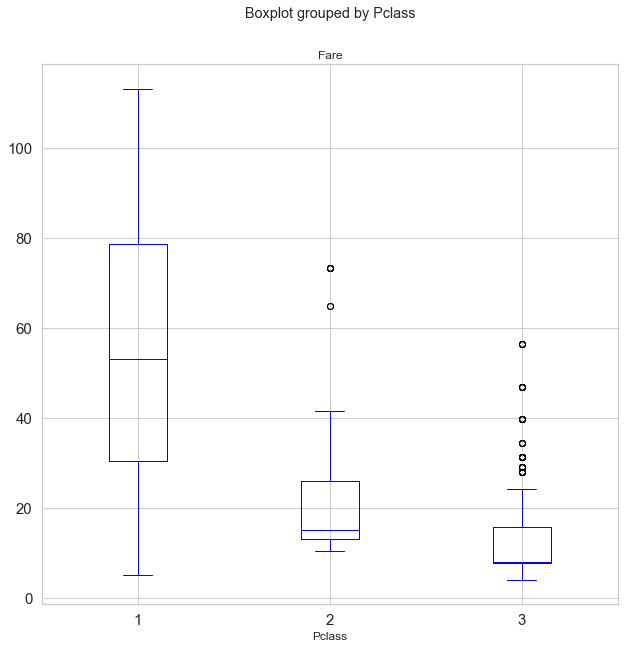

In [10]:
ax95 = df[(df['Fare'] > df['Fare'].quantile(.00)) &
   (df['Fare'] < df['Fare'].quantile(.95))]
ax95.boxplot('Fare', by='Pclass', color='blue', figsize=[10, 10], fontsize=15)


**4. Как процент выживших пассажиров зависит от пола пассажиров? Изобразите его с помощью `Seaborn.countplot`, используя аргумент `hue`.**

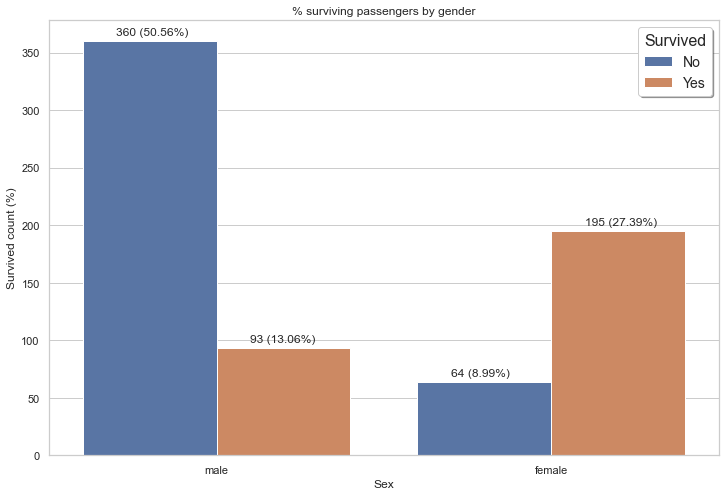

In [11]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('% surviving passengers by gender')
plt.ylabel('Survived count (%)')
plt.legend(shadow=True, fontsize=14, title='Survived', title_fontsize=16)

for i in ax.patches:
    y = i.get_height()
    ax.annotate(f"{y} ({round(100*y/len(df), 2)}%)", (i.get_x()+.1, y+5))

plt.show()

**5. Чем отличается распределение цен на билеты для тех, кто выжил, и для тех, кто не выжил. Изобразите это с помощью `Seaborn.boxplot`**

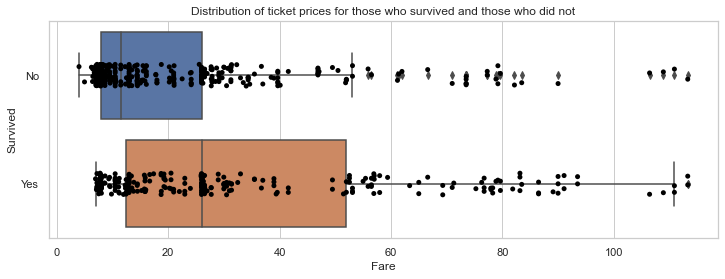

In [12]:
plt.figure(figsize=(12, 4))
plt.title(
    'Distribution of ticket prices for those who survived and those who did not')
sns.boxplot(x='Fare', y='Survived', data=ax95)
sns.stripplot(x="Fare", y="Survived",
              data=ax95, jitter=True, color="black")
plt.show()

**6. Как зависит выживаемость от возраста пассажиров? Подтвердите (графически) предположение, что молодые люди (< 30 лет) выживали чаще, чем пожилые люди (> 55 лет).**

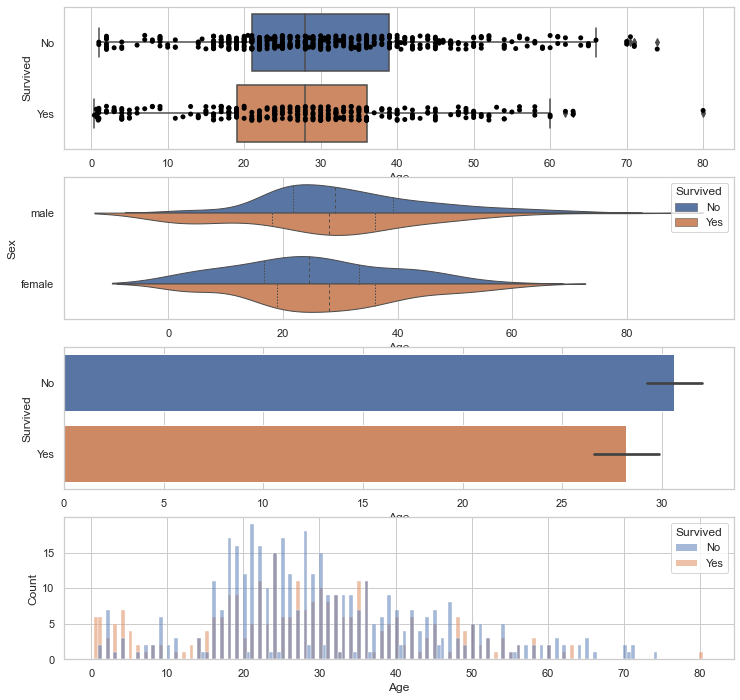

In [13]:
plt.figure(figsize=(12, 12))
plt.title(
    'Passenger survival depends on age. People under 30 survived more often')
plt.subplot(4, 1, 1)
sns.boxplot(data=df, x='Age', y='Survived')
plt.subplot(4, 1, 1)
sns.stripplot(data=df, x="Age", y="Survived", jitter=True, color="black")
plt.subplot(4, 1, 2)
sns.violinplot(data=df, x="Age", y="Sex", hue="Survived",
               split=True, inner="quart", linewidth=1)
plt.subplot(4, 1, 3)
sns.barplot(data=df, x="Age", y="Survived", estimator=np.average)
plt.subplot(4, 1, 4)
sns.histplot(data=df, x="Age", binwidth=0.5, hue="Survived")
plt.show()
